#### Basic understanding and masking of brain images with Nilearn

Assgn:  1  
Name:   Srinivas Kota  
RollNo: 2018101043  


In [1]:
!mkdir -p data

In [2]:
### DOWNLOAD DATA
from nilearn import datasets

DATA_DIR = './data/'
haxby_dataset = datasets.fetch_haxby(data_dir=DATA_DIR)

/Users/srinivaskota/work/iiit/CAI/neuroimage-processing/venv/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [3]:
### TODO 1

print(haxby_dataset['anat']) # anatomical image
print(haxby_dataset['func']) # functional image


['./data/haxby2001/subj2/anat.nii.gz']
['./data/haxby2001/subj2/bold.nii.gz']


In [4]:
### LOAD IMAGES
from nilearn import image



In [5]:
### TODO 2
anatomical_image_path = haxby_dataset['anat'][0]
anatomical = image.load_img(img=anatomical_image_path)
type(anatomical)

functional_image_path = haxby_dataset['func'][0]
functional = image.load_img(img=functional_image_path)
type(functional)

nibabel.nifti1.Nifti1Image

In [6]:
anatomical_image_shape = anatomical.shape
functional_image_shape = functional.shape

assert(anatomical_image_shape == (124, 256, 256))
assert(functional_image_shape == (40, 64, 64, 1452))

In [7]:
### TODO 3
# Q: do we use mask.nii.gz not in /subj2
mask_images_path = './data/haxby2001/subj2/mask*'
all_mask_images = image.load_img(img=mask_images_path)

assert(all_mask_images.shape == (40, 64, 64, 5))

In [8]:
### DATA VISUALISATION

from nilearn import plotting

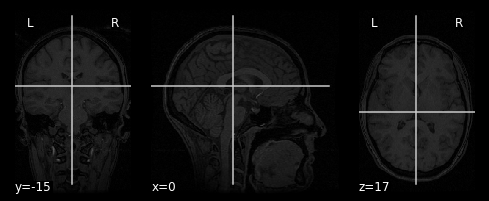

In [9]:
plotting.plot_anat(anatomical)
plotting.show()

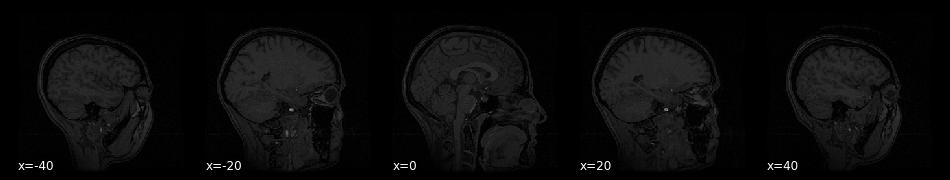

In [10]:
plotting.plot_anat(anatomical, display_mode='x', cut_coords=[-40, -20, 0, 20, 40])
plotting.show()

/Users/srinivaskota/work/iiit/CAI/neuroimage-processing/venv/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


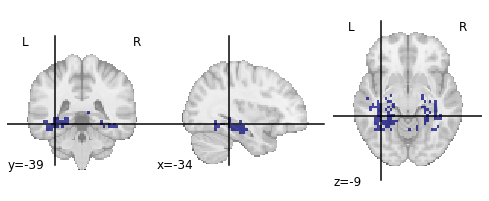

In [11]:
### TODO 4
roi_image_path = './data/haxby2001/subj2/mask4_vt.nii.gz'
mask_roi_image = image.load_img(img=roi_image_path)
plotting.plot_roi(roi_img=mask_roi_image)

### IMAGE MANIPULATION

In [12]:
### TODO 5: Specify functional image as input as it is 4D and we want to average in time
mean_functional_image = image.mean_img(imgs=functional)

assert(mean_functional_image.shape == (40, 64, 64))

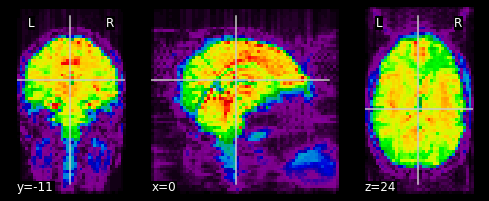

In [13]:
### TODO 6: Visualize the mean image using `plotting.plot_epi`
mean_epi_image = mean_functional_image
plotting.plot_epi(epi_img=mean_epi_image)
plotting.show()

In [14]:
### TODO 7: Specify the mean functional image
smooth_mean_functional_image = image.smooth_img(imgs=mean_functional_image, fwhm=8)


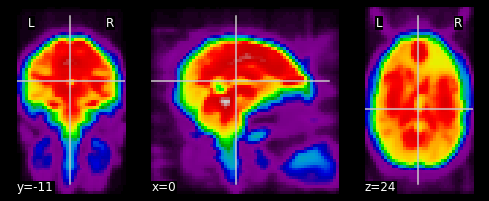

In [15]:
### TODO 8: Visualize the smoothed image using `plotting.plot_epi`
plotting.plot_epi(epi_img=smooth_mean_functional_image)

In [16]:
### MATH OPERATORS ON IMAGES

In [17]:
log_image = image.math_img("np.log(img)", img=anatomical)
negate_image = image.math_img("-img", img=anatomical)

<string>:1: RuntimeWarning: divide by zero encountered in log


In [18]:
### TODO 9: Use addition symbol with two images
images = [anatomical, log_image]
add_anatomical_img_with_log_img = image.math_img(formula="np.sum(imgs)", imgs=images)

<string>:1: RuntimeWarning: invalid value encountered in true_divide
/Users/srinivaskota/work/iiit/CAI/neuroimage-processing/venv/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "


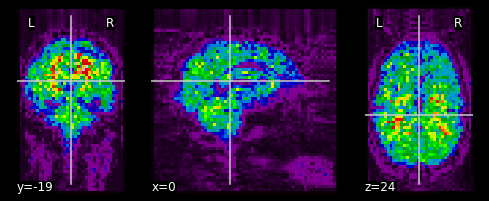

In [19]:
### TODO 10: Use Numpy functions
tsnr_functional_image = image.math_img(formula="np.mean(imgs, axis=3)/np.std(imgs, axis=3)", imgs=functional)

plotting.plot_epi(tsnr_functional_image)
plotting.show()

In [20]:
### TODO 11: Resampling images
resampled_imgae = image.resample_to_img(source_img=anatomical, target_img=functional)
print(anatomical_image_shape)
print(functional_image_shape)
print(resampled_imgae.shape)

assert(resampled_imgae.shape == functional.shape[:-1])

/Users/srinivaskota/work/iiit/CAI/neuroimage-processing/venv/lib/python3.7/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


(124, 256, 256)
(40, 64, 64, 1452)
(40, 64, 64)


In [21]:
### MASKING BRAIN IMAGES
from nilearn import masking

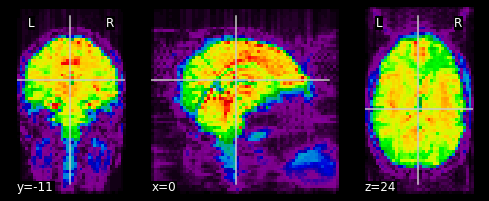

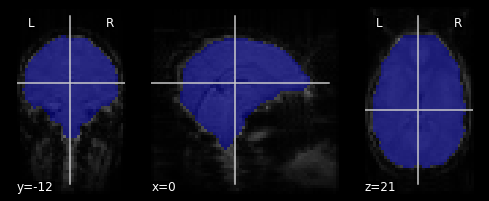

In [22]:
func_mask = masking.compute_epi_mask(mean_functional_image)

plotting.plot_epi(mean_functional_image)
plotting.plot_roi(func_mask, mean_functional_image)
plotting.show()

In [23]:
print("Before masking, our data has shape %s ..." % (functional.shape,))
functional_masked = masking.apply_mask(functional, func_mask)
print("After masking, shape %s and is a %s" % (functional_masked.shape, type(functional_masked).__name__))

Before masking, our data has shape (40, 64, 64, 1452) ...
After masking, shape (1452, 24083) and is a ndarray


In [24]:
### TODO 12: Apply HAXBY mask
haxby_mask = image.load_img(haxby_dataset['mask_face']) # there are others

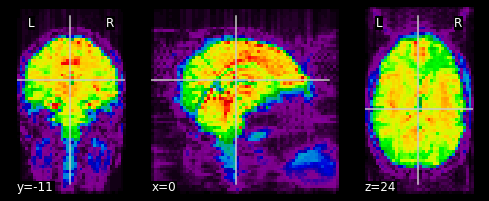

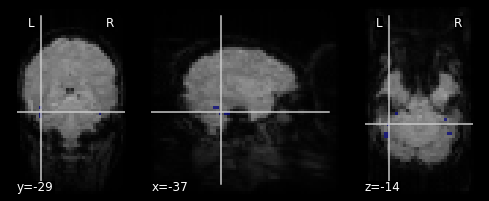

In [25]:
plotting.plot_epi(mean_functional_image)
plotting.plot_roi(haxby_mask, mean_functional_image)
plotting.show()

In [26]:
from nilearn.input_data import NiftiMasker

In [27]:
masker = NiftiMasker(mask_img=func_mask, verbose=True)

In [28]:
masked_functional_image = masker.fit_transform(functional)
print(masked_functional_image.shape)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('data/haxby2001/subj2/bold.nii.gz')
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
(1452, 24083)


In [29]:
### TODO 13: Implement the smoothing and mask strategy parameter
# spatial smoothing with fwhm=7 and strategy='epi'
smoothing_mask = NiftiMasker(smoothing_fwhm=7, mask_strategy='epi', verbose=True)
smoothed_masked_functional_image = smoothing_mask.fit_transform(functional)
print(smoothed_masked_functional_image.shape)

[NiftiMasker.fit] Loading data from Nifti1Image('data/haxby2001/subj2/bold.nii.gz')
[NiftiMasker.fit] Computing the mask
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('data/haxby2001/subj2/bold.nii.gz')
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
(1452, 24083)


[NiftiMasker.fit] Loading data from Nifti1Image(
shape=(40, 64, 64),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [   0.   ,    0.   ,    0.   ,    1.   ]])
)
[NiftiMasker.fit] Computing the mask
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 1),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [   0.   ,    0.   ,    0.   ,    1.   ]])
)
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


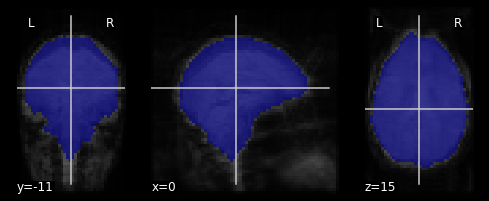

Shape of Masked Image: (1, 26523)
[[530.01386233 526.92187748 515.82417606 ... 536.99166726 591.43374052
  619.34765923]]


In [30]:
### TODO 14: Implement masking pipeline

# 1. Download: fMRI data
# 2. Implement: NiftiMasker - specify mask on init, apply mask on fMRI data
# 3. Plot: plot mask image overlayed on mean of fMRI data
# 4. Print: masked output (2D-matrix)

# 1.
haxby_subj3 = datasets.fetch_haxby(data_dir=DATA_DIR, subjects=(3))

# 2.
functional_subj3 = image.load_img(haxby_subj3['func'])
mean_functional_image_subj3 = image.mean_img(functional_subj3)

smoothing_mask = NiftiMasker(smoothing_fwhm=6, mask_strategy='epi', verbose=True)
masked_image = smoothing_mask.fit_transform(mean_functional_image_subj3)

# 3.
plotting.plot_roi(smoothing_mask.mask_img_, mean_functional_image_subj3)
plotting.show()

# 4.
print(f"Shape of Masked Image: {masked_image.shape}")
print(masked_image)